# Exploratory Data Analysis on Ecommerce Dataset


In [55]:
#importing required python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('Ecommerce.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.shape

(541909, 8)

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [78]:
df.describe(include='all')

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,month,day,hour,money_spent,customer_id,country
count,526054,526054,526054,526054.000000,526054,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054
unique,20728,3941,4077,NaN,19052,NaN,NaN,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2258,2907,NaN,1114,NaN,NaN,NaN,NaN,NaN,NaN,481143
mean,NaN,NaN,NaN,10.730874,NaN,3.871747,7.551879,3.428091,13.074633,20.188016,15287.548590,NaN
std,NaN,NaN,NaN,157.591838,NaN,42.016560,3.508391,1.844960,2.442553,272.250300,1480.587699,NaN
min,NaN,NaN,NaN,1.000000,NaN,-11062.060000,1.000000,1.000000,6.000000,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,5.000000,2.000000,11.000000,3.900000,14382.000000,NaN
50%,NaN,NaN,NaN,4.000000,NaN,2.080000,8.000000,3.000000,13.000000,9.920000,15287.000000,NaN
75%,NaN,NaN,NaN,11.000000,NaN,4.130000,11.000000,5.000000,15.000000,17.700000,16242.000000,NaN


# check for missing values in all coloumns and replace theme with appropriate matrics 

In [79]:
# As i checked data sepreatly there are 24.92 % Customer ids are missing and o.92 % of Descriptions
# are missing which is fine we can imput mode instead of that but customer id is huge in amount we can 
# drop that column for better result but project says that you have to imput appropiate matric and 
# another observation comes into picture that where 0.92 % of descriptions are missing at the same 
# place customer ids are also missing so another approch is to drop records where there is null present
# but i use mode in descriptions and mean in customer id because there is not too much spread...

In [8]:
#Replacing null values in description with mode and in customer_id with mean
df['Description'].fillna('WHITE HANGING HEART T-LIGHT HOLDER',inplace=True)
df['CustomerID'].fillna(df.CustomerID.mean(),inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df. CustomerID=df['CustomerID'].astype('int64')

In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [11]:
#changing coloumn names for simplification
df.rename(index=str, columns={"InvoiceNo": "invoice_num",
                              "StockCode" : "stock_code",
                              "Description" : "description",
                              "Quantity" : "quantity",
                              "InvoiceDate" : "invoice_date",
                              "UnitPrice" : "unit_price",
                              "CustomerID" : "customer_id",
                              "Country" : "country"}, inplace=True)

# Remove duplicate rows

In [12]:
df.drop_duplicates(inplace=True,ignore_index=True)

# Remove rows which has negative values Quantity column

In [13]:
neg_quantity_rows=df.loc[df.quantity<0].index
df.drop(index=neg_quantity_rows,inplace=True)
df.reset_index(drop=True,inplace=True)

# Add the columns - Month, Day and Hour for the invoice

In [14]:
df.insert(loc=6,column="month",value=pd.DatetimeIndex(df.invoice_date).month)
df.insert(loc=7,column="day",value=pd.DatetimeIndex(df.invoice_date).dayofweek+1)
df.insert(loc=8,column="hour",value=pd.DatetimeIndex(df.invoice_date).hour)
df.insert(loc=9,column="money_spent",value=df.quantity*df.unit_price)
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,month,day,hour,money_spent,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,12,3,8,15.30,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,12,3,8,20.34,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,12,3,8,22.00,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,12,3,8,20.34,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,12,3,8,20.34,17850,United Kingdom


 # How many orders made by the customers?

In [15]:
order_by_Cust=df.groupby(by=["customer_id","country"],as_index= False)["invoice_num"].count()
order_by_Cust

,customer_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4350,18280,United Kingdom,10
4351,18281,United Kingdom,7
4352,18282,United Kingdom,12
4353,18283,United Kingdom,721


# TOP 5 customers with higher number of orders

In [17]:
Top_5_orders=order_by_Cust.sort_values(by="invoice_num",ascending=False).head()
Top_5_orders

,customer_id,country,invoice_num
2175,15287,United Kingdom,131936
4027,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413


#  How much money spent by the customers?

In [18]:
money_spent_by_cust=df.groupby(by=["customer_id","country"],as_index= False)["money_spent"].sum()
money_spent_by_cust

,customer_id,country,money_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4350,18280,United Kingdom,180.60
4351,18281,United Kingdom,80.82
4352,18282,United Kingdom,178.05
4353,18283,United Kingdom,2045.53


# TOP 5 customers with highest money spent

In [19]:
Top_5_money_spent=money_spent_by_cust.sort_values(by="money_spent",ascending=False).round(2)
Top_5_money_spent

,customer_id,country,money_spent
2175,15287,United Kingdom,1695082.02
1698,14646,Netherlands,280206.02
4218,18102,United Kingdom,259657.30
3745,17450,United Kingdom,194390.79
3025,16446,United Kingdom,168472.50
...,...,...,...
4115,17956,United Kingdom,12.75
3031,16454,United Kingdom,6.90
1802,14792,United Kingdom,6.20
3234,16738,United Kingdom,3.75


# How many orders per month?

In [20]:
df.groupby(by=["month"],as_index=False)["invoice_num"].nunique()

,month,invoice_num
0,1,1120
1,2,1126
2,3,1531
3,4,1318
4,5,1731
5,6,1576
6,7,1540
7,8,1409
8,9,1896
9,10,2129


# How many orders per day? 

In [21]:
df.groupby(by=["day"],as_index=False)["invoice_num"].nunique()

,day,invoice_num
0,1,3237
1,2,3717
2,3,3865
3,4,4408
4,5,3294
5,7,2207


# How many orders per hour?

In [22]:
df.groupby(by=["hour"],as_index=False)["invoice_num"].nunique()

,hour,invoice_num
0,6,1
1,7,29
2,8,568
3,9,1538
4,10,2431
5,11,2473
6,12,3323
7,13,2818
8,14,2557
9,15,2474


# How many orders for each country?

In [23]:
df.groupby(by=["country"],as_index=False)["invoice_num"].nunique()

,country,invoice_num
0,Australia,57
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,6
6,Channel Islands,26
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


# How much money spent by each country?

In [44]:
df.groupby(by=["country"],as_index=False)["money_spent"].sum().round()

,country,money_spent
0,Australia,138454.0
1,Austria,10199.0
2,Bahrain,754.0
3,Belgium,41196.0
4,Brazil,1144.0
5,Canada,3666.0
6,Channel Islands,20441.0
7,Cyprus,13503.0
8,Czech Republic,827.0
9,Denmark,18955.0


# Histogram for all numeric variables 

(array([5.26051e+05, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([-11062.06,  14585.32,  40232.7 ,  65880.08,  91527.46, 117174.84,
        142822.22, 168469.6 ]),
 <BarContainer object of 7 artists>)

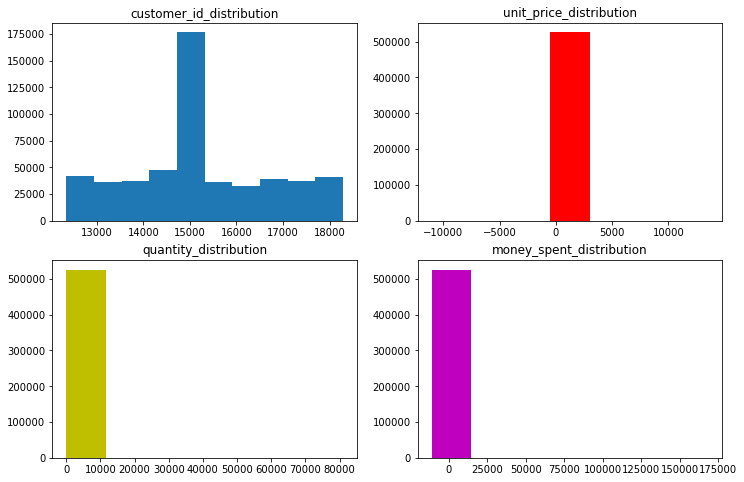

In [57]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1,title='customer_id_distribution')
plt.hist(df.customer_id)
plt.subplot(2,2,2,title='unit_price_distribution')
plt.hist(df.unit_price,color='r',linewidth=4,bins=7)
plt.subplot(2,2,3,title='quantity_distribution')
plt.hist(df.quantity,color='y',linewidth=4,bins=7)
plt.subplot(2,2,4,title='money_spent_distribution')
plt.hist(df.money_spent,color='m',linewidth=4,bins=7)

# Line chart to show trend of data

<AxesSubplot:title={'center':'hour vs money_spent'}, xlabel='hour', ylabel='money_spent'>

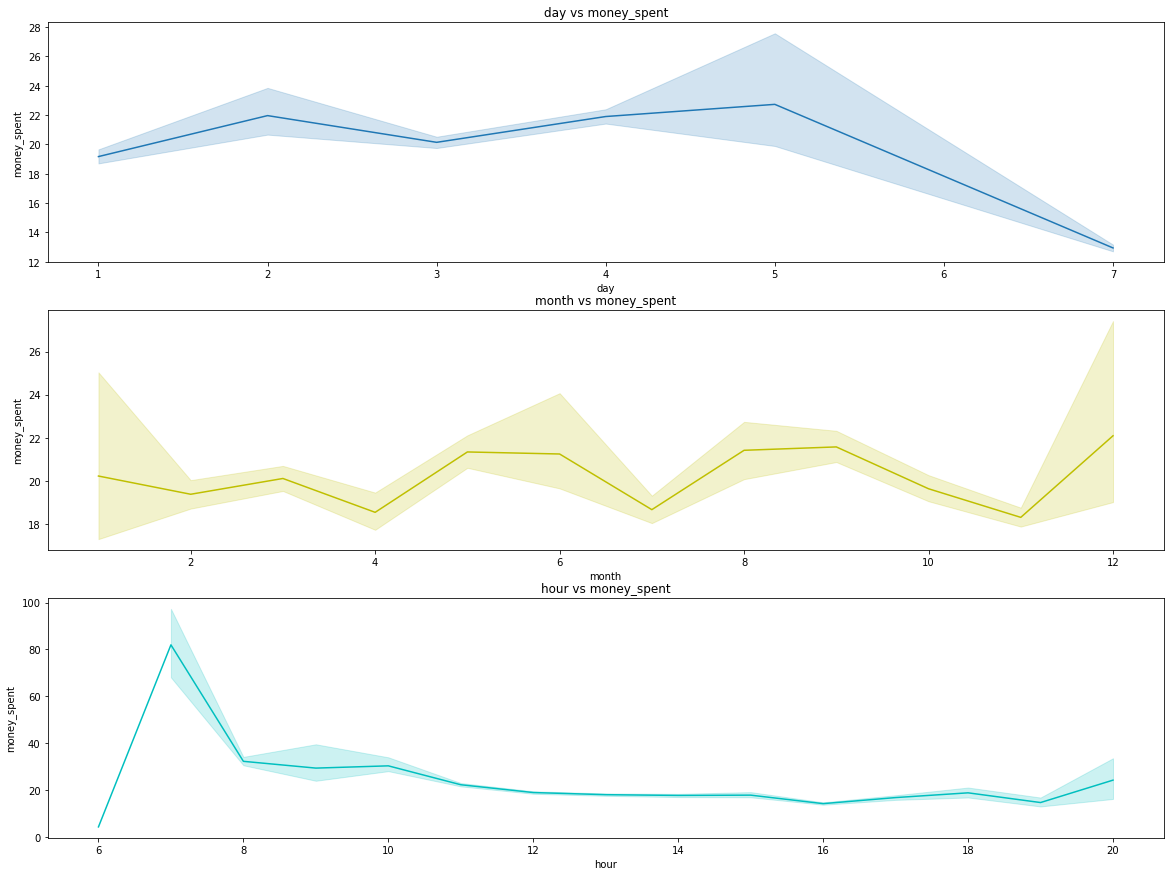

In [62]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1,title='day vs money_spent')
sns.lineplot(x='day',y='money_spent',data=df)
plt.subplot(3,1,2,title='month vs money_spent')
sns.lineplot(x='month',y='money_spent',data=df,color='y')
plt.subplot(3,1,3,title='hour vs money_spent')
sns.lineplot(x='hour',y='money_spent',data=df,color='c')


# Barplot to show countries money spent except UK

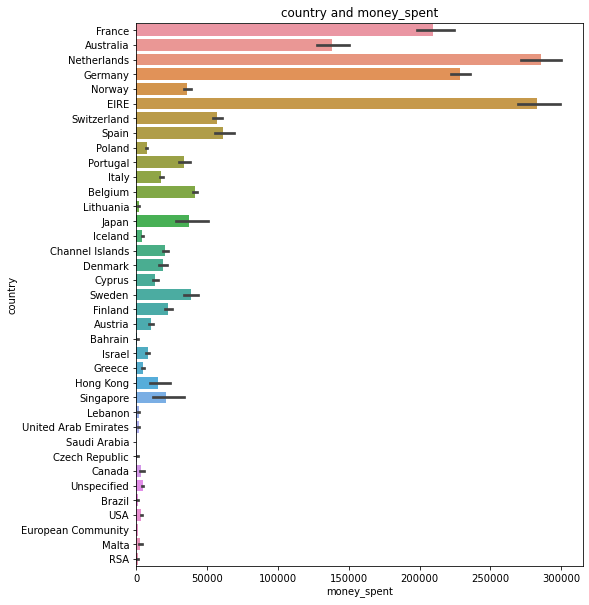

In [74]:
plt.figure(figsize=(8,10))
plt.title("country and money_spent")
sns.barplot(x="money_spent",y="country",data=df[df.country!="United Kingdom"],estimator=np.sum)
plt.show()

# Barplot to show countries quantity perchase except UK

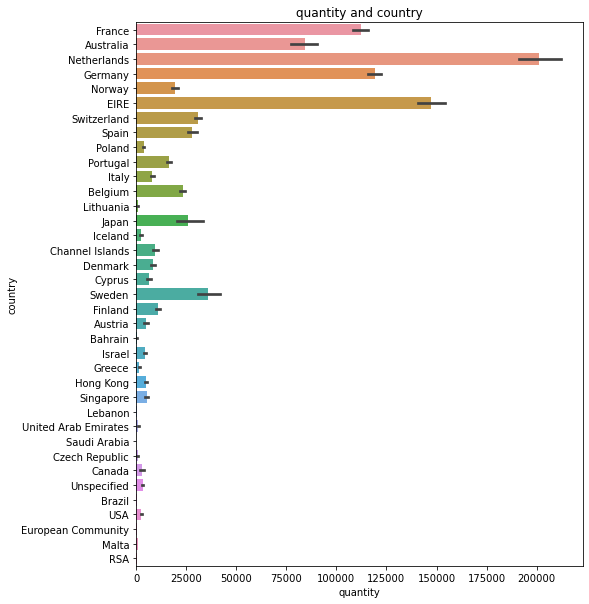

In [77]:
plt.figure(figsize=(8,10))
plt.title("quantity and country")
sns.barplot(y="country",x="quantity",data=df[df.country!="United Kingdom"],estimator=np.sum)
plt.show()